## Master thesis: Car Sales Forecasting in Finland using Machine Learning

### Install Required Libraries

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

### Loading data

In [36]:
import pandas as pd
import time

# Input filename, path to source files and output filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/'
filename = path + 'Retails_ALL_CY11_CY22.xlsx'
external_filename = path + 'External_indicators.xlsx'

start_time = time.time()

# Load files into pandas dataframes
df = pd.concat(pd.read_excel(filename, sheet_name=None), ignore_index=True)
df_external = pd.concat(pd.read_excel(external_filename, sheet_name=None), ignore_index=True)

end_time = time.time()
time_elapsed = end_time - start_time 
print('Completed in %f seconds.' % time_elapsed)

Completed in 151.998406 seconds.


### Preprocessing data

In [37]:
# Get only Finland orders
df = df[df.RetailCountry == 'FIN']

# Remove duplicates by "orderNumber"
df.drop_duplicates(subset=['orderNumber'], keep='last', inplace=True)

# Remove unnecessary columns
df.drop(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'Month'], axis=1, inplace=True)

In [38]:
# Convert RetailDate to date
df['RetailDate'] = pd.to_datetime(df['RetailDate'], dayfirst=True).dt.date
# Get year of the ReailDate
df['year'] = pd.DatetimeIndex(df['RetailDate']).year
# Get month of the RetailDate
df['month'] = pd.DatetimeIndex(df['RetailDate']).month

In [39]:
# Preview dataframe
df

,orderNumber,RetailDate,year,month
2,NNE0161192,2011-01-03,2011,1
3,NNE0146363,2011-01-03,2011,1
4,NNE0147851,2011-01-03,2011,1
5,NNE0144683,2011-01-03,2011,1
6,NNE0151309,2011-01-03,2011,1
...,...,...,...,...
465317,NNE0646993,2022-08-15,2022,8
465346,NNE0646781,2022-08-08,2022,8
465350,NNE0646864,2022-08-12,2022,8
465351,NNE0646872,2022-08-11,2022,8


In [40]:
# Generating index by date, grouping by and counting
df = df.groupby(['year', 'month']).size().reset_index(name='Orders')
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df.drop(['year', 'month'], axis=1, inplace=True)
df = df.set_index("Date")

In [41]:
# Preview dataframe
df

,Orders
Date,
2011-01-01,900
2011-02-01,672
2011-03-01,916
2011-04-01,786
2011-05-01,763
...,...
2022-04-01,320
2022-05-01,224
2022-06-01,233


In [42]:
# Set Date as index in the external dataset
df_external.set_index('Date', inplace=True)

# Remove unnecessary columns
df_external.drop(['Light_fuel_oil', 'Diesel', 'Petrol_95',
       'Petrol_98', 'Passenger_cars', 'Vans'], axis=1, inplace=True)

In [43]:
# Merge both dataframes
data = pd.concat([df,df_external], axis=1)

In [44]:
# Preview dataframe
data

,Orders,CCI,CPI,CoL,Avg_fuel_price,TIV,Active_Population_1K_persons,Employed_1K_persons,Unemployed_1K_persons,Unemployment_rate_%
Date,,,,,,,,,,
2011-01-01,900,0.3,101.78,1783,1.3575,14993,2584,2363,221,8.6
2011-02-01,672,0.4,102.40,1794,1.3500,10270,2619,2395,224,8.5
2011-03-01,916,-0.2,102.96,1804,1.4100,13927,2596,2340,256,9.9
2011-04-01,786,-0.6,103.16,1807,1.4200,12491,2650,2428,222,8.4
2011-05-01,763,-1.5,103.21,1808,1.4150,14219,2754,2483,270,9.8
...,...,...,...,...,...,...,...,...,...,...
2022-04-01,320,-11.7,121.09,2121,2.0600,7220,2782,2589,193,6.9
2022-05-01,224,-11.6,122.67,2149,2.1750,8798,2867,2641,227,7.9
2022-06-01,233,-14.3,123.56,2165,2.4075,8305,2929,2729,200,6.8


In [45]:
# Save data to Excel so we don't need to run previous steps every time
data.to_excel("output.xlsx")  

### -- Execution can start from here

In [46]:
import pandas as pd

# Load file into a pandas dataframe
file = 'D:/Git_Projects/5. Master_thesis/output.xlsx'
data = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)
data = data.set_index("Date")

In [47]:
# Data statistics
data.describe()

,Orders,CCI,CPI,CoL,Avg_fuel_price,TIV,Active_Population_1K_persons,Employed_1K_persons,Unemployed_1K_persons,Unemployment_rate_%
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,548.921429,-3.393571,110.314929,1932.607143,1.416875,10213.071429,2687.178571,2470.378571,216.828571,8.075714
std,206.945969,4.710607,4.162411,72.955559,0.204342,2358.765674,75.210139,82.122865,35.169465,1.313509
min,117.000000,-15.900000,101.780000,1783.000000,1.115000,4286.000000,2562.000000,2330.000000,143.000000,5.400000
25%,400.750000,-6.025000,108.290000,1897.000000,1.296250,8875.750000,2626.750000,2408.750000,191.000000,7.000000
50%,539.500000,-3.700000,109.595000,1920.000000,1.397500,9962.500000,2674.500000,2463.500000,214.000000,8.000000
75%,664.500000,0.100000,112.420000,1969.250000,1.473125,11221.750000,2732.500000,2529.250000,238.250000,9.000000
max,1266.000000,6.800000,124.050000,2173.000000,2.407500,25629.000000,2929.000000,2729.000000,320.000000,11.700000


In [53]:
data.isna().sum()

Orders                          0
CCI                             0
CPI                             0
CoL                             0
Avg_fuel_price                  0
TIV                             0
Active_Population_1K_persons    0
Employed_1K_persons             0
Unemployed_1K_persons           0
Unemployment_rate_%             0
dtype: int64

### Plotting data

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

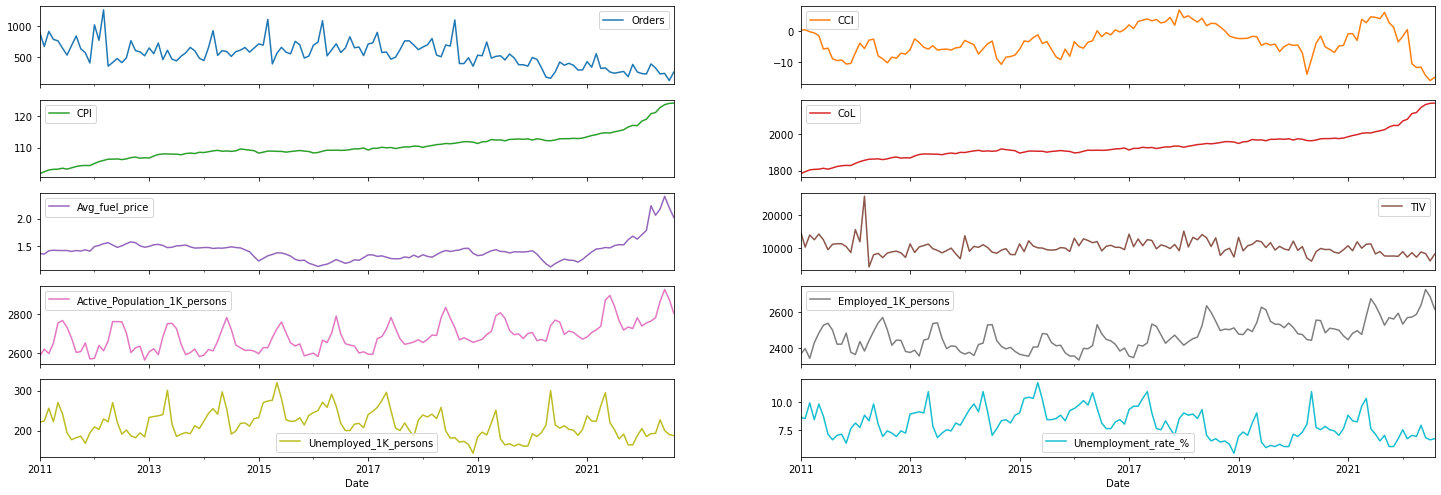

In [48]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [25, 10]
data.plot(legend=True, subplots=True, layout=(6,2))

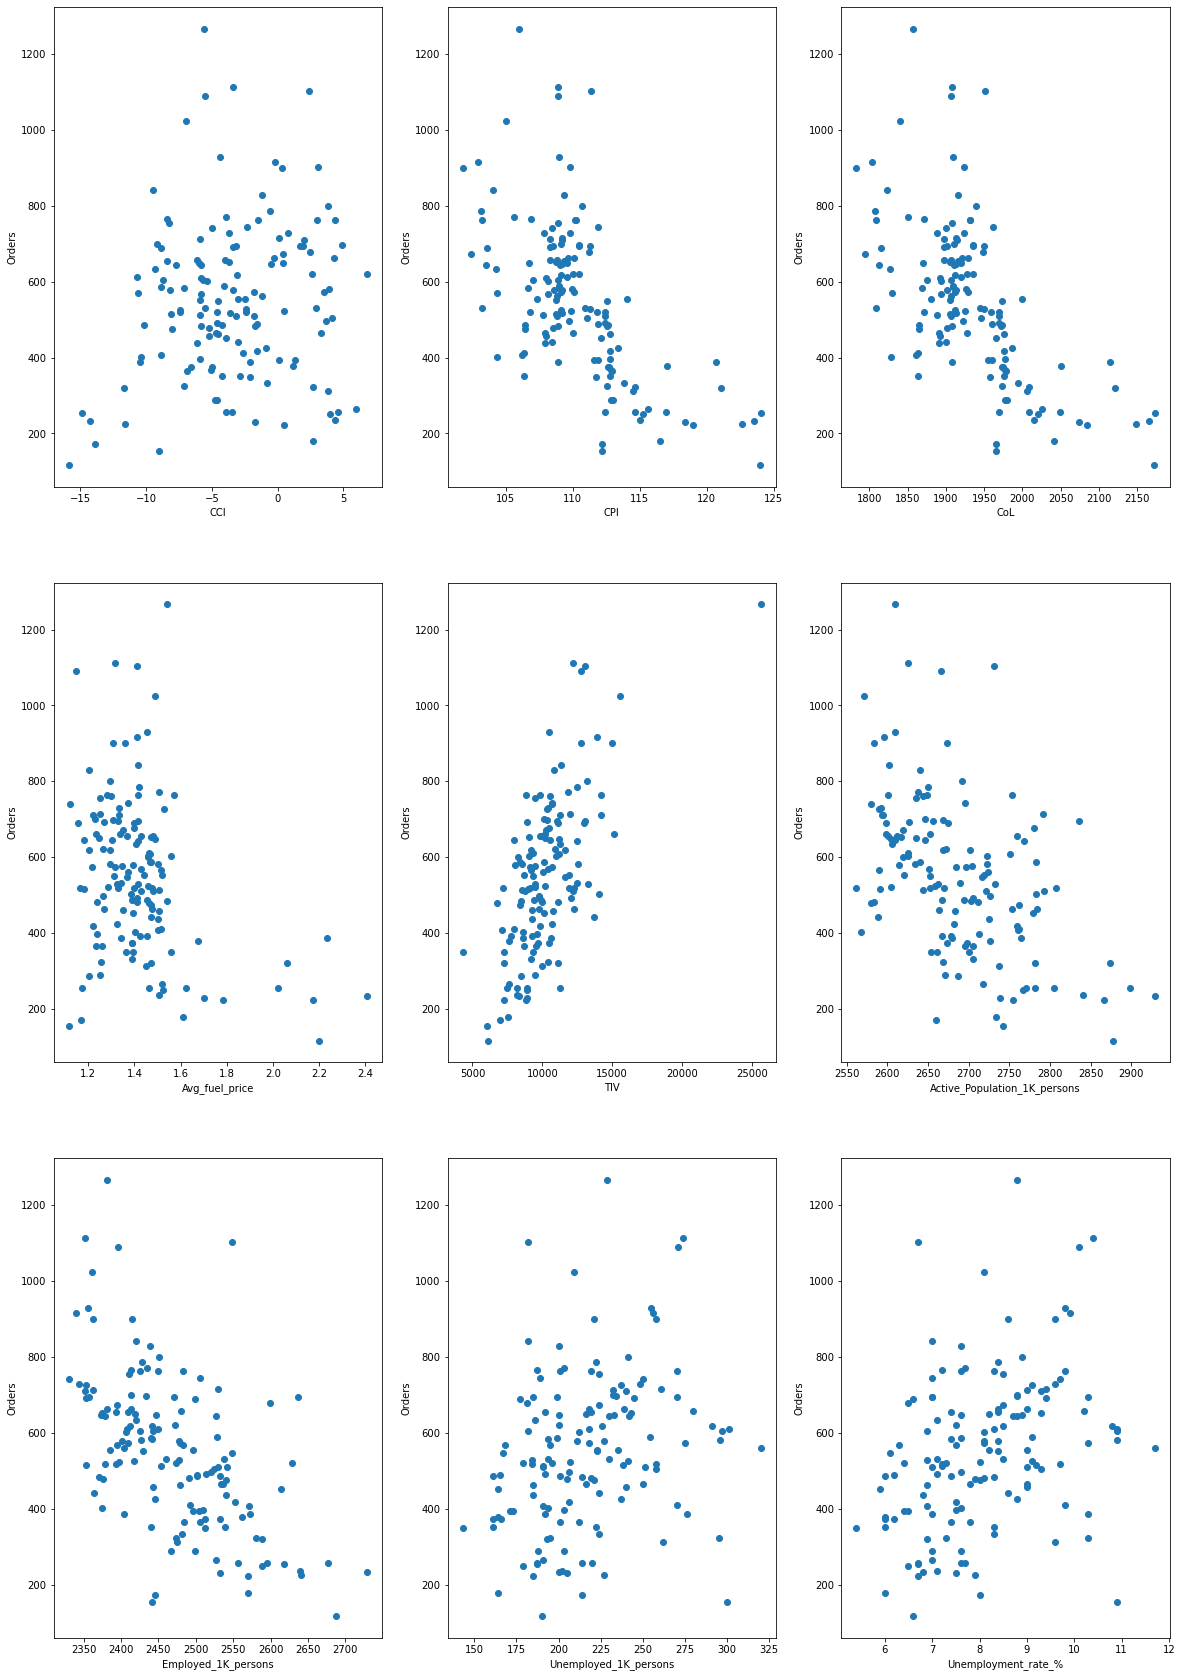

In [66]:
# Define a function to plot the scatterplots of the relationships between 
# all independent variables and the dependent variable
def plot_relationships(df, num_cols):
    
    variables = df.columns    
    # assume that the dependent variable is in the first column
    dep_var = variables[0]
    ind_var = df.loc[:, df.columns != 'Orders'] # Select independant variable
    figs = len(dep_var)
    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    fig = 1
    plt.figure(figsize=(20,30))
    # Loop through all independent variables and create the scatter plot
    for i in ind_var:
        pltfignums = [str(num_rows), str(num_cols), str(fig)]
        pltfig = int(''.join(pltfignums))
        plt.subplot(pltfig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1

plot_relationships(data,3)

<AxesSubplot:>

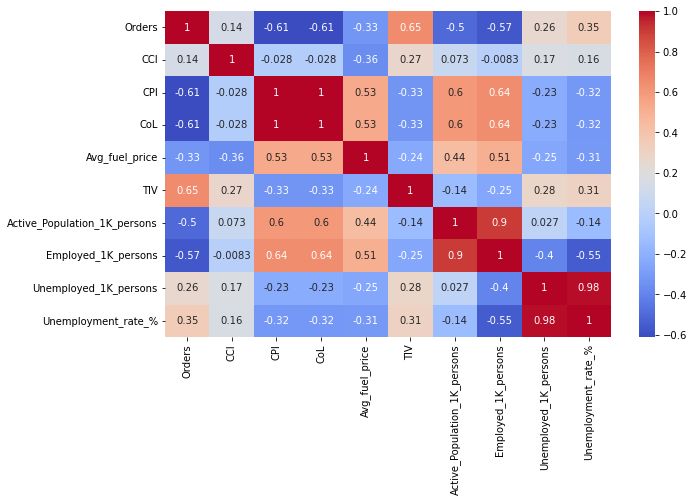

In [54]:
# Import seaborn
import seaborn as sns

# Plot the correlations as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2g')

### Data split and scale

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_temp, X_test, y_train_temp, y_test = train_test_split(data.iloc[:,:-1], 
                                                              data['Orders'], 
                                                              test_size=0.2, 
                                                              random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)
                                                      
# scale the data with object range of 0-1
scaler = MinMaxScaler()

scaler.fit_transform(X_train)

scaler.transform(X_valid)
scaler.transform(X_test)

array([[ 0.29250457,  0.47465438,  0.46235566,  0.46174142,  0.22373541,
         0.36494401,  0.38964578,  0.46115288,  0.27683616],
       [ 0.43327239,  0.66359447,  0.31362587,  0.31398417,  0.04474708,
         0.29171157,  0.23160763,  0.29323308,  0.3220339 ],
       [ 0.31170018,  0.41474654,  0.24757506,  0.24802111,  0.29766537,
         0.19870684,  0.22343324,  0.30827068,  0.27118644],
       [ 0.10694698,  0.47465438,  0.49053118,  0.49076517,  0.10116732,
         0.2430305 ,  0.29700272,  0.3433584 ,  0.33898305],
       [ 0.30895795,  0.53917051,  0.29699769,  0.29815303,  0.28015564,
         0.20835871,  0.43324251,  0.50125313,  0.27118644],
       [ 0.77879342,  0.3640553 ,  0.12055427,  0.12137203,  0.28404669,
         0.52696434,  0.02452316,  0.07769424,  0.37288136],
       [ 0.54021938,  0.88940092,  0.36073903,  0.36147757,  0.12451362,
         0.26013213,  0.23705722,  0.29824561,  0.32768362],
       [ 0.4369287 ,  0.70506912,  0.3330254 ,  0.33245383,  0

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
# Create list of median predictions that has the same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

# Compute the relevant scores
base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 157.9643.
Mean Squared Error: 40103.1786.
R^2 Score = -0.1300.
Accuracy = 64.30%.


### LightGBM Regression

In [102]:
import lightgbm as lgbm
lgbm_regressor = lgbm.LGBMRegressor()
mlgbm = lgbm_regressor.fit(X_train, y_train)

scoring(mlgbm, X_valid, y_valid)

Model Performance
Mean Absolute Error: 52.5656.
Mean Squared Error: 5069.0861.
R^2 Score = 0.8572.
Accuracy = 88.03%.


### Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf = rf_regressor.fit(X_train, y_train)

scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 17.3518.
Mean Squared Error: 931.0039.
R^2 Score = 0.9738.
Accuracy = 95.95%.


### XGBoost (Extreme Gradient Boosting)

In [89]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_regressor = xgb.XGBRegressor(random_state=42)
xgb = xgb_regressor.fit(X_train, y_train)

scoring(xgb, X_valid, y_valid)

Model Performance
Mean Absolute Error: 13.6356.
Mean Squared Error: 328.0999.
R^2 Score = 0.9908.
Accuracy = 97.48%.


### Cross-validation

In [103]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

# Create the models to be tested
mlgbm = lgbm.LGBMRegressor()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = XGBRegressor(random_state=42)

models = [mlgbm, rf_reg, xgb_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

comp

,LGBMRegressor(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=42, ...)"
Mean Absolute Error,60.6684,12.0140,12.9273
Mean Squared Error,8132.2444,821.6734,451.0516
R^2,0.7880,0.9801,0.9885
Accuracy,89.2095,97.8632,97.7008


In [104]:
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold'])

r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)

r2_comp

,1st Fold,2nd Fold,3rd Fold,4th Fold,Average
LGBMRegressor(),0.8006,0.7286,0.8202,0.8027,0.7880
RandomForestRegressor(random_state=42),0.9872,0.9921,0.9889,0.9521,0.9801
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=42, ...)",0.9935,0.9896,0.9944,0.9765,0.9885


### Hyperparameters Tuning - Random Forest

In [94]:
# Set hyperparameters possibilities for tuning Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
rf_max_depth.append(None)
rf_max_features = ['auto', 'sqrt', 'log2']
rf_criterion = ['mse', 'absolute_error']
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]
rf_min_impurity_decrease = [0.0, 0.05, 0.1]
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

rf_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['mse', 'absolute_error'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [95]:
from sklearn.model_selection import RandomizedSearchCV
# Tune the Random Forest Model
rf_base = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

rf_random.fit(X_train_temp, y_train_temp)

rf_random.best_estimator_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=35,
                      min_impurity_decrease=0.1, min_samples_split=4,
                      n_estimators=600)

### Hyperparameters Tuning - XGBoost (Extreme Gradient Boosting)

In [111]:
# Set hyperparameters possibilities for tuning XGBoost
xgb_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]
xgb_tree_method = ['auto', 'exact', 'approx', 'hist']
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

# Tune the XGBoost Model
xgb_base = XGBRegressor()

xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 200, cv = 3, verbose = 2, 
                                random_state = 42, n_jobs = -1)

xgb_random.fit(X_train_temp, y_train_temp)

xgb_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'tree_method': 'auto',
 'objective': 'reg:squarederror',
 'n_estimators': 200,
 'min_child_weight': 2,
 'max_depth': 6,
 'gamma': 0,
 'eta': 0.30000000000000004}

### Final Evaluation

In [112]:
# Create the final LigthGBM

# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators = 600,
                                 min_samples_split = 4,
                                 min_impurity_decrease = 0.1,
                                 max_features = 'sqrt',
                                 max_depth = 35,
                                 criterion = 'absolute_error',
                                 bootstrap = False,
                                 random_state = 42)

# Create the fnal Extreme Gradient Booster
xgb_final = XGBRegressor(tree_method = 'auto',
                         objective = 'reg:squarederror',
                         n_estimators = 200,
                         min_child_weight = 2,
                         max_depth = 6,
                         gamma = 0,
                         eta = 0.3,
                         random_state = 42)

# Train the models using 80% of the original data
# LGBM goes here --
rf_final.fit(X_train_temp, y_train_temp)
xgb_final.fit(X_train_temp, y_train_temp)

# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores
    
# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

comp

,LGBMRegressor(),RandomForestRegressor(random_state=42),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=42, ...)"
Mean Absolute Error,60.6684,12.0140,12.9273
Mean Squared Error,8132.2444,821.6734,451.0516
R^2,0.7880,0.9801,0.9885
Accuracy,89.2095,97.8632,97.7008


### Plot feature importance

In [114]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

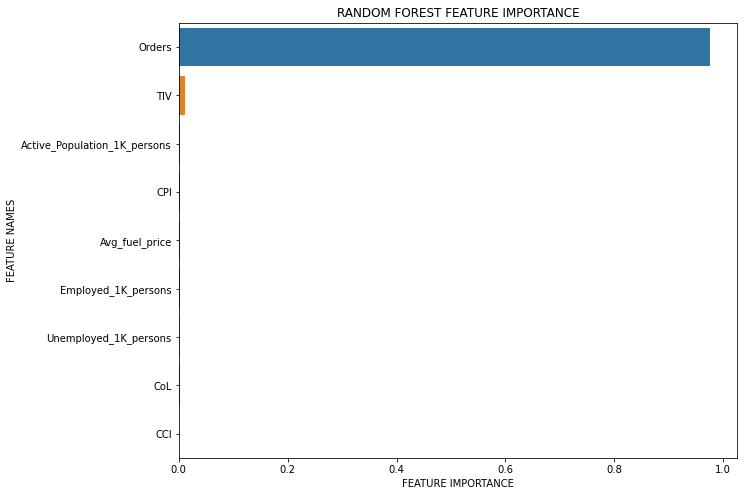

In [117]:
plot_feature_importance(rf_regressor.feature_importances_,X_train_temp.columns,'RANDOM FOREST ')

### XGBoost (Extreme Gradient Boosting)

In [20]:
import xgboost as xgb

# check xgboost version
print(xgb.__version__)

# Select input and target variables
X = data.drop(['Orders'], axis=1)
y = data["Orders"]

# Create the DMatrix 
dmatrix = xgb.DMatrix(data=X, label=y)

# Definiing params
params={"objective":"reg:squarederror","max_depth":4}

# L1 regularization
reg_params = [1,10,100]
rmses_l1=[]

for reg in reg_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=dmatrix, params=params,nfold=4,num_boost_round=10,metrics="rmse",as_pandas=True,seed=123)
    rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])

print("Best rmse as a function of l1:")
print(pd.DataFrame(list(zip(reg_params,rmses_l1)), columns=["l1","rmse"]))

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# L2 regularization
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

1.7.2
Best rmse as a function of l1:
    l1        rmse
0    1  141.909760
1   10  142.030444
2  100  149.481071
Best rmse as a function of l2:
    l2        rmse
0    1  184.852129
1   10  210.660478
2  100  351.448666


In [118]:
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")
plt.show()

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'train'

### Model tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

dmatrix = xgb.DMatrix(data=X,label=y)

gbm_param_grid = {'learning_rate': np.arange(0.05,1.05,.05),
                    'n_estimators': [200],
                    'subsample': np.arange(0.05,1.05,.05)}

gbm = xgb.XGBRegressor()

randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=25, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, y)
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters found:  {'subsample': 0.3, 'n_estimators': 200, 'learning_rate': 0.05}
Lowest RMSE found:  181.18036412771912


In [28]:
# Create the DMatrix
dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds        rmse
0                    5  183.122624
1                   10  147.596829
2                   15  145.746563


In [21]:
X_train.shape, X_test.shape

((112, 13), (28, 13))

In [29]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [25]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 72.653859


In [32]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=42)

In [33]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,368.897880,12.618361,368.081924,28.865079
1,337.347801,11.430440,337.864388,30.209572
2,308.618192,10.960824,309.358712,31.367627
3,282.799589,10.193485,283.653487,32.242495
4,259.745429,9.594686,261.709599,32.982860


In [34]:
print((cv_results["test-rmse-mean"]).tail(1))

32    115.488021
Name: test-rmse-mean, dtype: float64


In [35]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

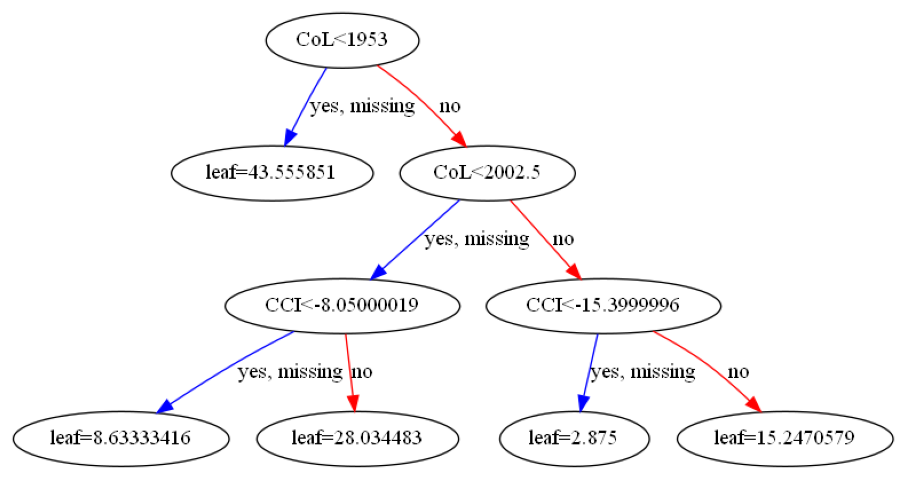

In [36]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [119]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'plot_importance'

## Choosing classifier

In [120]:
from xgboost import XGBRegressor
import xgboost as xgb
#create an xgboost regression model
model = XGBRegressor()

## Fitting the model

In [121]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

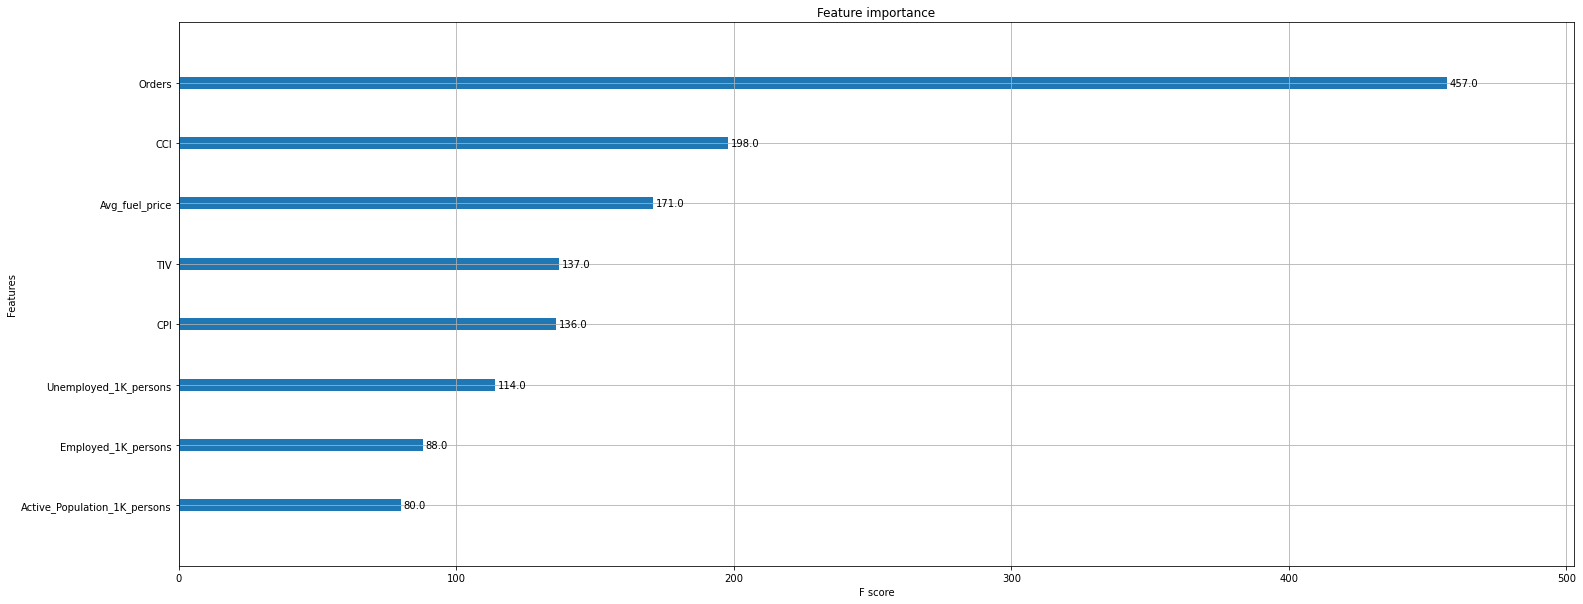

In [122]:
xgb.plot_importance(model, ax=plt.gca())

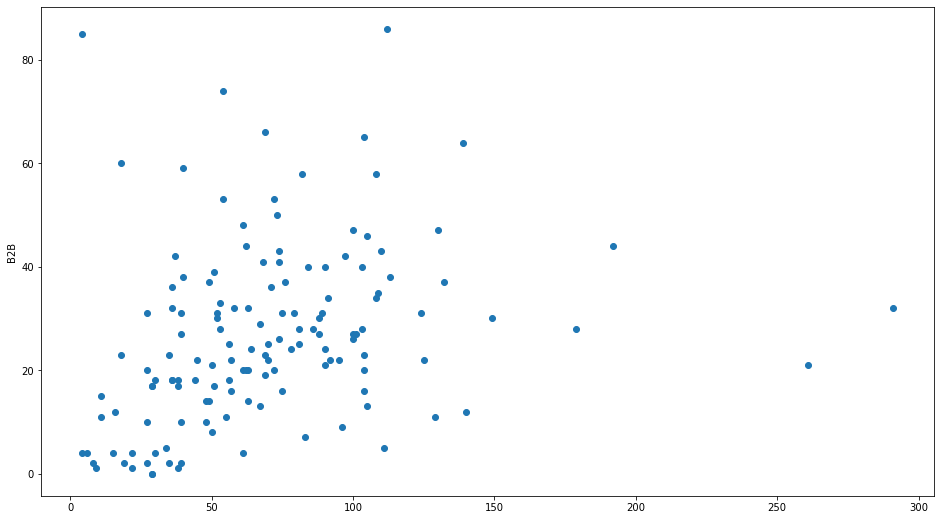

In [48]:
plt.scatter(clean_pivot["CAPTIVE"], clean_pivot["B2B"])
plt.ylabel("B2B")
plt.show()

## Tuning hyperparameters

In [ ]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [26]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# split data into input and output columns
X, y = datavalues[:, :-1], datavalues[:, -1]
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 20.692 (7.774)


In [51]:
# Scale the independent variables
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [52]:
import xgboost
reg = xgboost.XGBRegressor(objective='reg:squarederror', \
                           n_estimators=1000, \
                          nthread=24)
reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=24,
             nthread=24, num_parallel_tree=1, predictor='auto', ...)

In [53]:
predictions_xgb = reg.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_xgb = sqrt(mean_squared_error(y_test, predictions_xgb))
print("XGBoost - Root Mean Square Error (RMSE): %.3f" % rmse_xgb)

XGBoost - Root Mean Square Error (RMSE): 68.086
